# The Zeros experiment

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import os

# Пути к данным
data_path = 'data/passenger_values_extended.csv'
forecast_path = 'forecast0.csv'


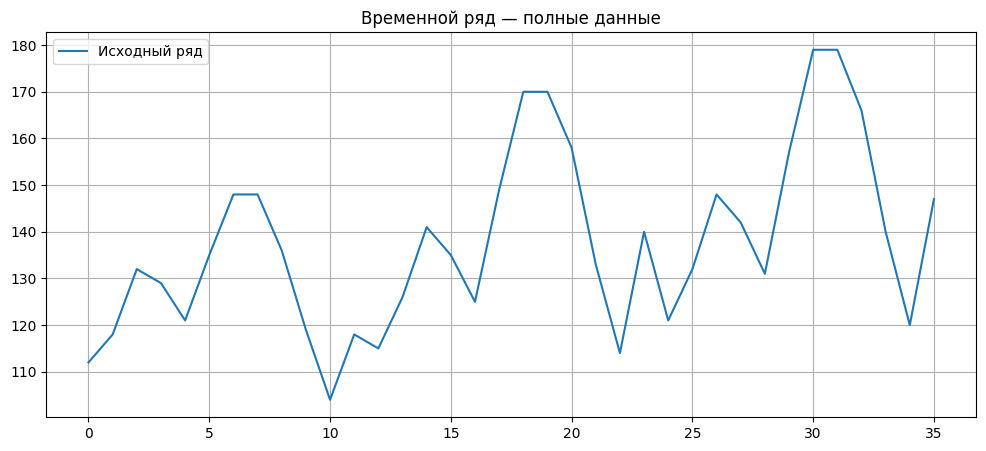

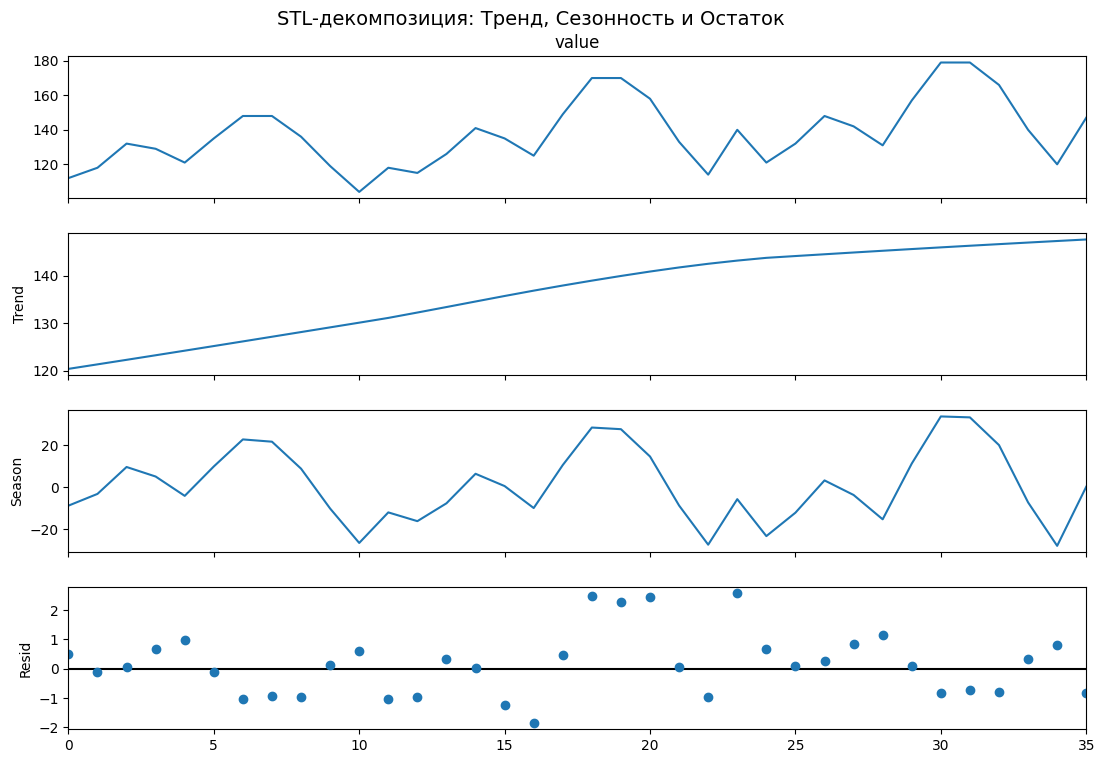

In [5]:
#1. Загрузка исходного временного ряда
df = pd.read_csv(data_path)
series = df.iloc[:, 0]  # берем первую колонку
series.index = pd.RangeIndex(start=0, stop=len(series), step=1)  # на всякий случай

# Визуализация исходного ряда
plt.figure(figsize=(12, 5))
plt.plot(series, label='Исходный ряд')
plt.title('Временной ряд — полные данные')
plt.legend()
plt.grid(True)
plt.show()

# 2. STL-декомпозиция (тренд и сезонность)
stl = STL(series, period=12)
result = stl.fit()

# Отрисовка компонентов
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL-декомпозиция: Тренд, Сезонность и Остаток", fontsize=14)
plt.show()



Прогнозы от моделей: ['arima', 'holt', 'prophet', 'tbats', 'ensemble']


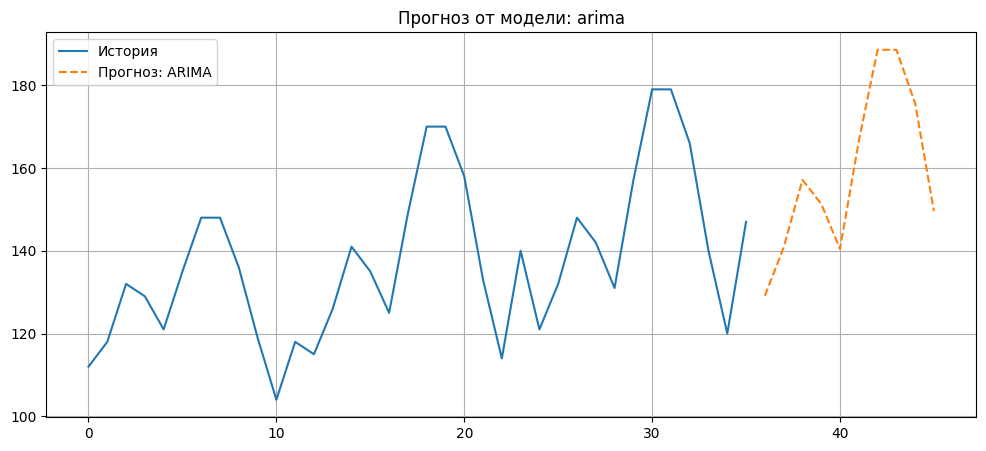

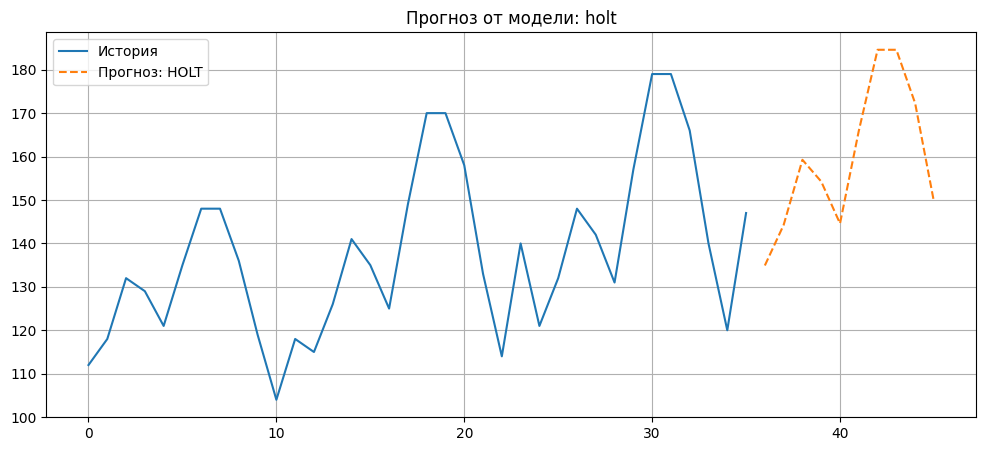

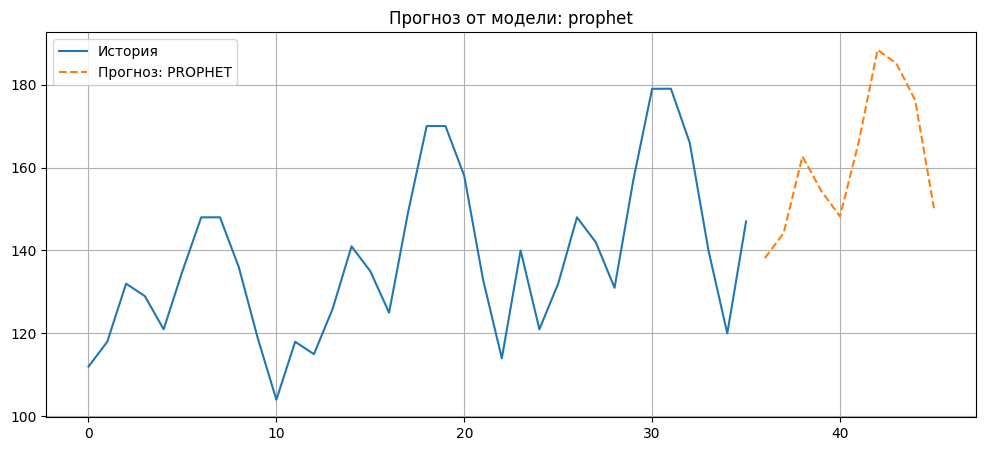

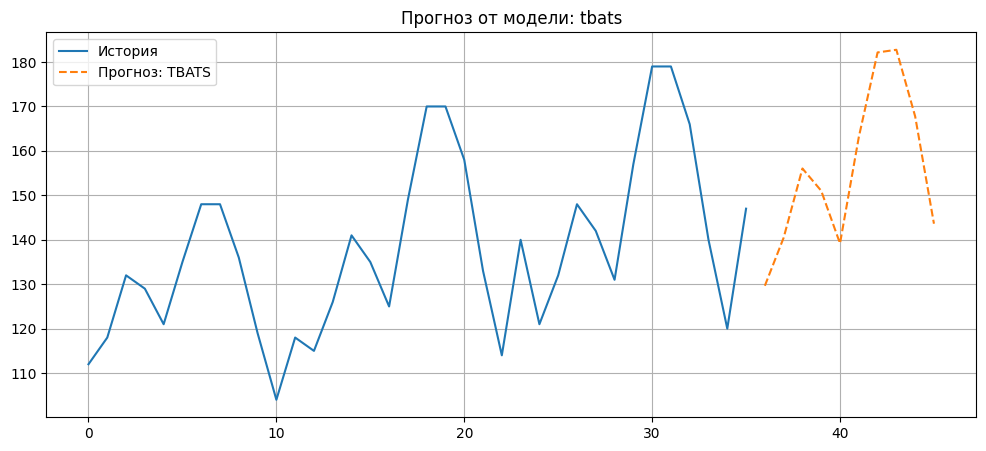

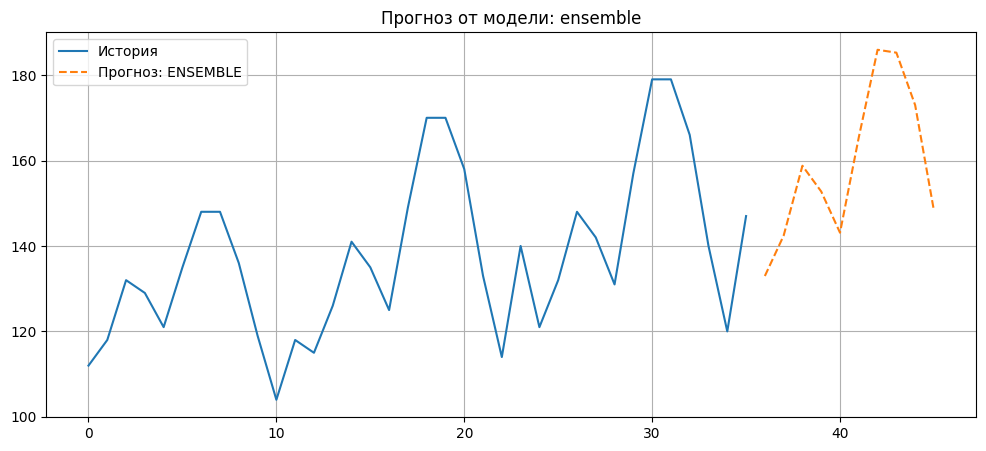

In [10]:
# 3. Загрузка прогноза
forecast_df = pd.read_csv(forecast_path)

# Убедимся, что названия колонок корректны
print("Прогнозы от моделей:", list(forecast_df.columns))

# 4. Визуализация прогноза от каждой модели
# Настройки:
horizon = len(forecast_df)
n_context = 50  # сколько последних точек показывать из исходного ряда

context = series[-n_context:]

# Построим график для каждой модели
for model_name in forecast_df.columns:
    forecast = forecast_df[model_name]

    plt.figure(figsize=(12, 5))
    plt.plot(context.index, context.values, label='История')
    plt.plot(range(context.index[-1]+1, context.index[-1]+1 + horizon),
             forecast, label=f'Прогноз: {model_name.upper()}', linestyle='--')
    plt.title(f"Прогноз от модели: {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
result = forecast_df['arima']
result.to_csv(f'result{0}_Sharova.csv', index=False)

# The First experiment

In [14]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import os

# Пути к данным
data_path = 'data/data1.csv'
forecast_path = 'forecast1.csv'


In [75]:
df = pd.read_csv('data/Data_1_stud.csv', sep=';')
df

,Period,Sales_quantity
0,01.01.2015,12729.0
1,01.02.2015,11636.0
2,01.03.2015,15922.0
3,01.04.2015,15227.0
4,01.05.2015,8620.0
...,...,...
59,01.12.2019,NaN
60,01.01.2020,NaN
61,01.02.2020,NaN
62,01.03.2020,NaN


In [76]:
df = df.drop(columns=['Period'])
df = df.dropna()
df = df.rename(columns={'Sales_quantity': 'value'})
df.to_csv(f'data/data1.csv', index=False)  # сохраняем в переменную data1


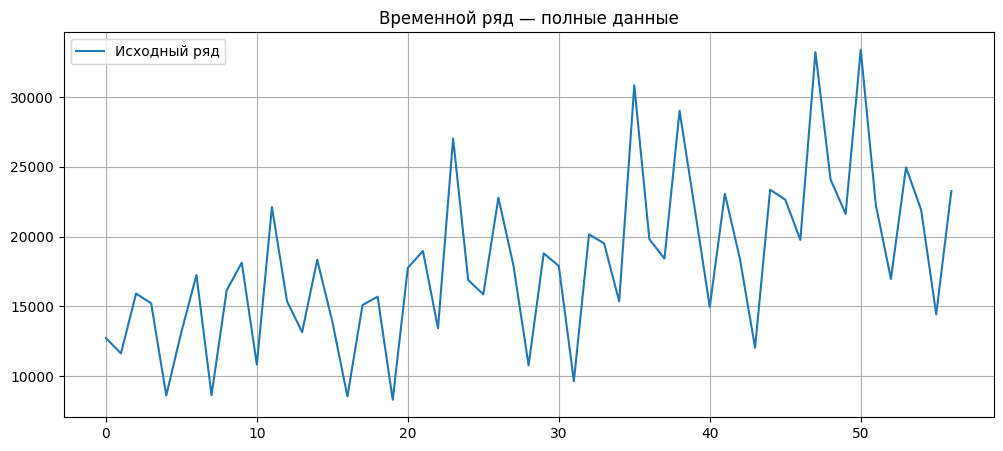

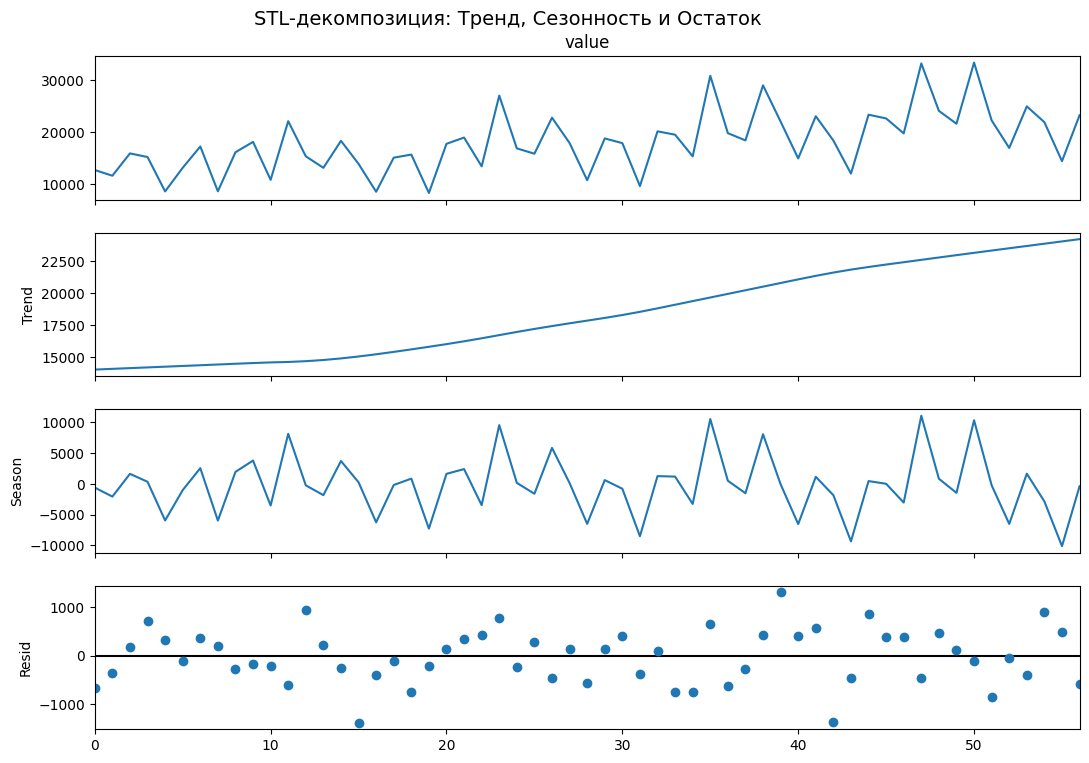

In [34]:
#1. Загрузка исходного временного ряда
df = pd.read_csv(data_path)
series = df.iloc[:, 0]  # берем первую колонку
series.index = pd.RangeIndex(start=0, stop=len(series), step=1)  # на всякий случай

# Визуализация исходного ряда
plt.figure(figsize=(12, 5))
plt.plot(series, label='Исходный ряд')
plt.title('Временной ряд — полные данные')
plt.legend()
plt.grid(True)
plt.show()

# 2. STL-декомпозиция (тренд и сезонность)
stl = STL(series, period=12)
result = stl.fit()

# Отрисовка компонентов
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL-декомпозиция: Тренд, Сезонность и Остаток", fontsize=14)
plt.show()



Прогнозы от моделей: ['arima', 'holt', 'prophet', 'tbats', 'ensemble']


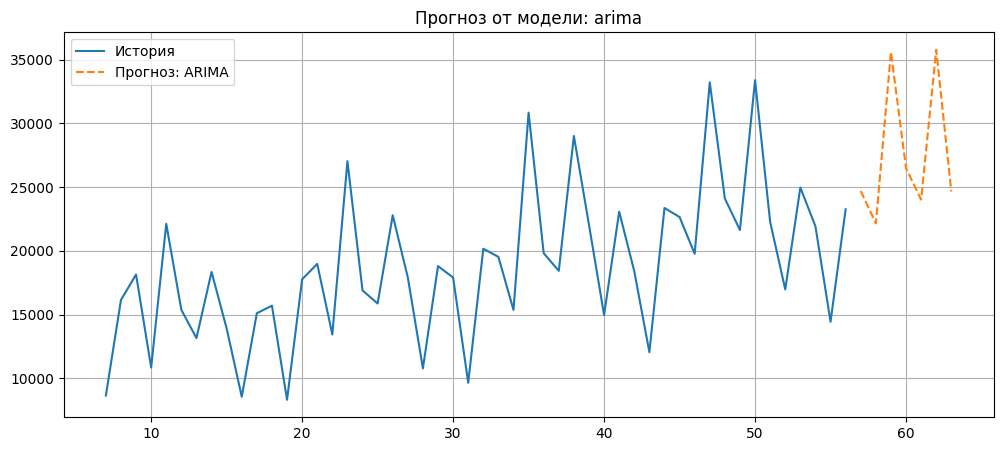

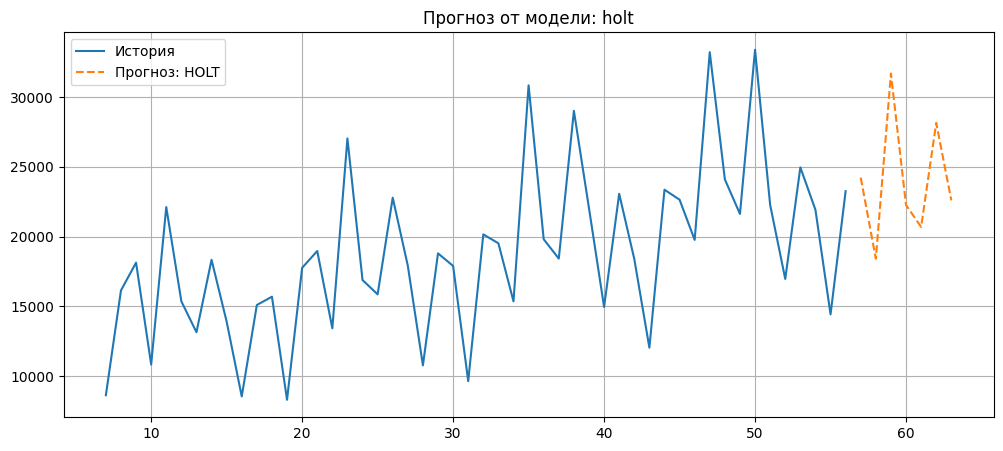

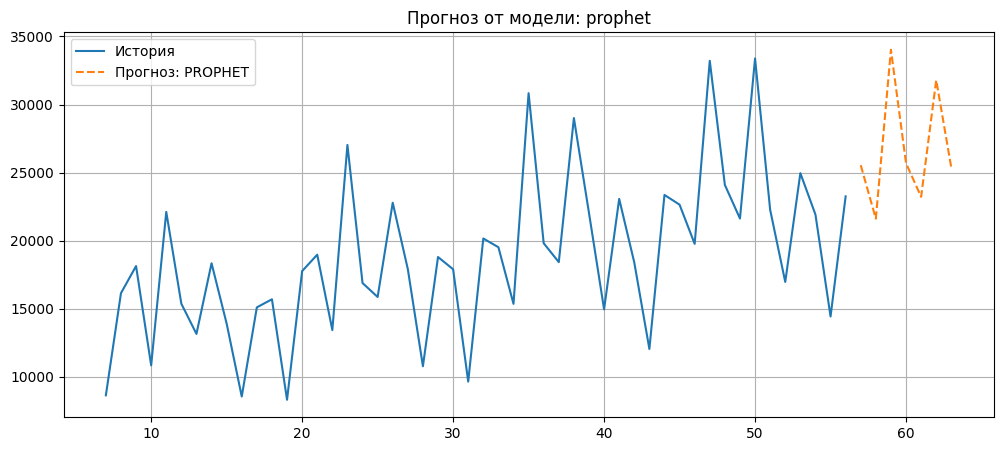

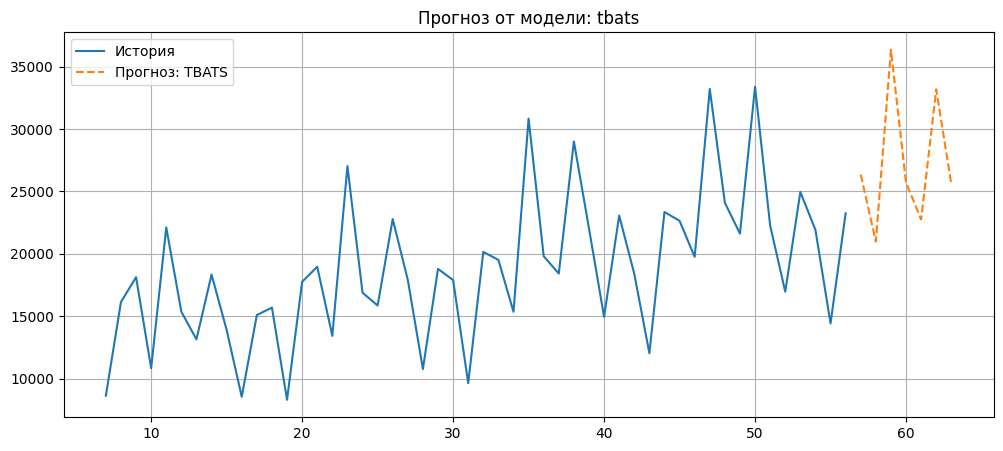

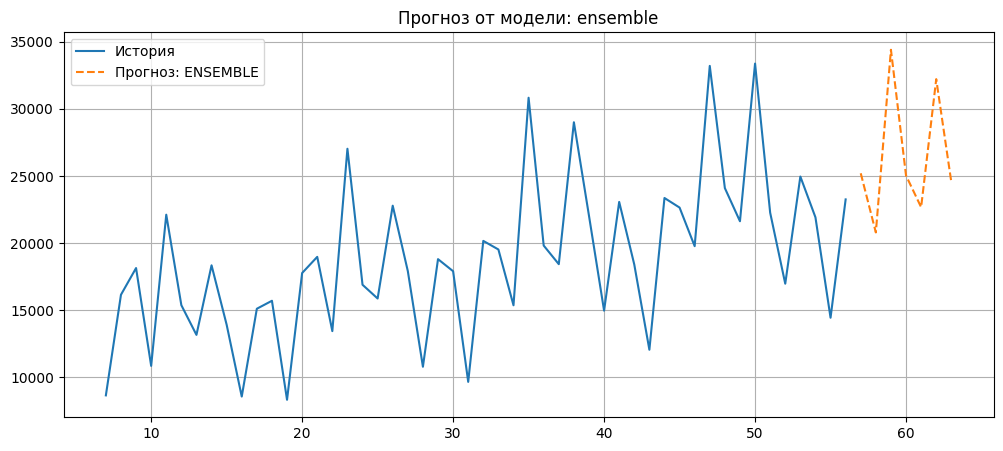

In [38]:
# 3. Загрузка прогноза
forecast_df = pd.read_csv(forecast_path)

# Убедимся, что названия колонок корректны
print("Прогнозы от моделей:", list(forecast_df.columns))

# 4. Визуализация прогноза от каждой модели
# Настройки:
horizon = len(forecast_df)
n_context = 50  # сколько последних точек показывать из исходного ряда

context = series[-n_context:]

# Построим график для каждой модели
for model_name in forecast_df.columns:
    forecast = forecast_df[model_name]

    plt.figure(figsize=(12, 5))
    plt.plot(context.index, context.values, label='История')
    plt.plot(range(context.index[-1]+1, context.index[-1]+1 + horizon),
             forecast, label=f'Прогноз: {model_name.upper()}', linestyle='--')
    plt.title(f"Прогноз от модели: {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
result = forecast_df['arima']
result.to_csv(f'result{1}_Sharova.csv', index=False)

# The Second experiment

In [68]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import os

# Пути к данным
data_path = 'data/data2.csv'
forecast_path = 'forecast2.csv'


In [45]:
import pandas as pd

# Попробуем common кодировки
encodings = ['cp1252', 'latin1', 'iso-8859-1', 'windows-1251']

for encoding in encodings:
    try:
        df = pd.read_csv('data/Data_2_Stud.csv', encoding=encoding)
        print(f"Успешно прочитано с кодировкой: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Ошибка с кодировкой: {encoding}")



Успешно прочитано с кодировкой: cp1252


In [70]:
df = pd.read_csv('data/Data_2_Stud.csv', encoding='cp1252', sep=';')
df

,Month,Value
0,ÿíâ.16,"216,37"
1,ôåâ.16,"238,01"
2,ìàð.16,"273,71"
3,àïð.16,"260,03"
4,ìàé.16,"266,53"
...,...,...
115,àâã.25,NaN
116,ñåí.25,NaN
117,îêò.25,NaN
118,íîÿ.25,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   120 non-null    object
 1   Value   97 non-null     object
dtypes: object(2)
memory usage: 2.0+ KB


In [72]:
df = df.drop(columns=['Month'])
df = df.dropna()
df = df.rename(columns={'Value': 'value'})
df['value'] = df['value'].str.replace(',', '.').astype(float)
df


,value
0,216.3700
1,238.0100
2,273.7100
3,260.0300
4,266.5300
...,...
92,358.1396
93,282.8544
94,316.2935
95,611.0830


In [73]:
df.to_csv(f'data/data2.csv', index=False) 

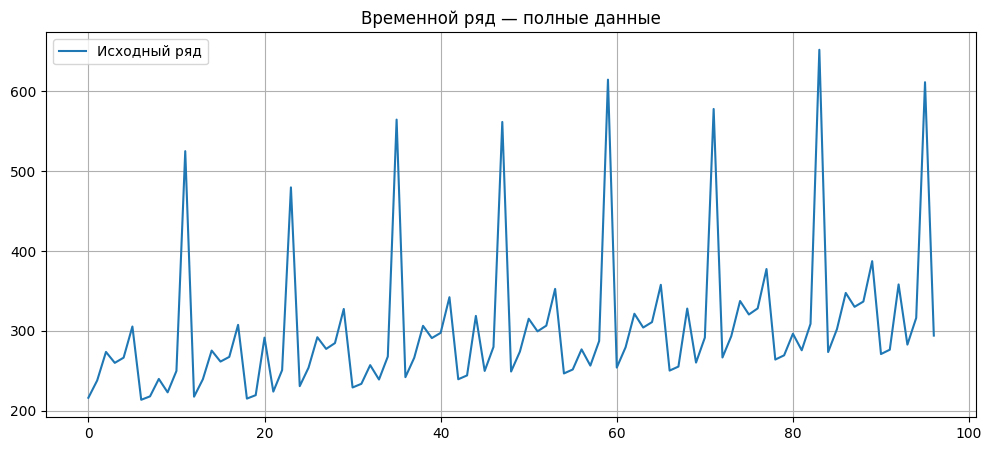

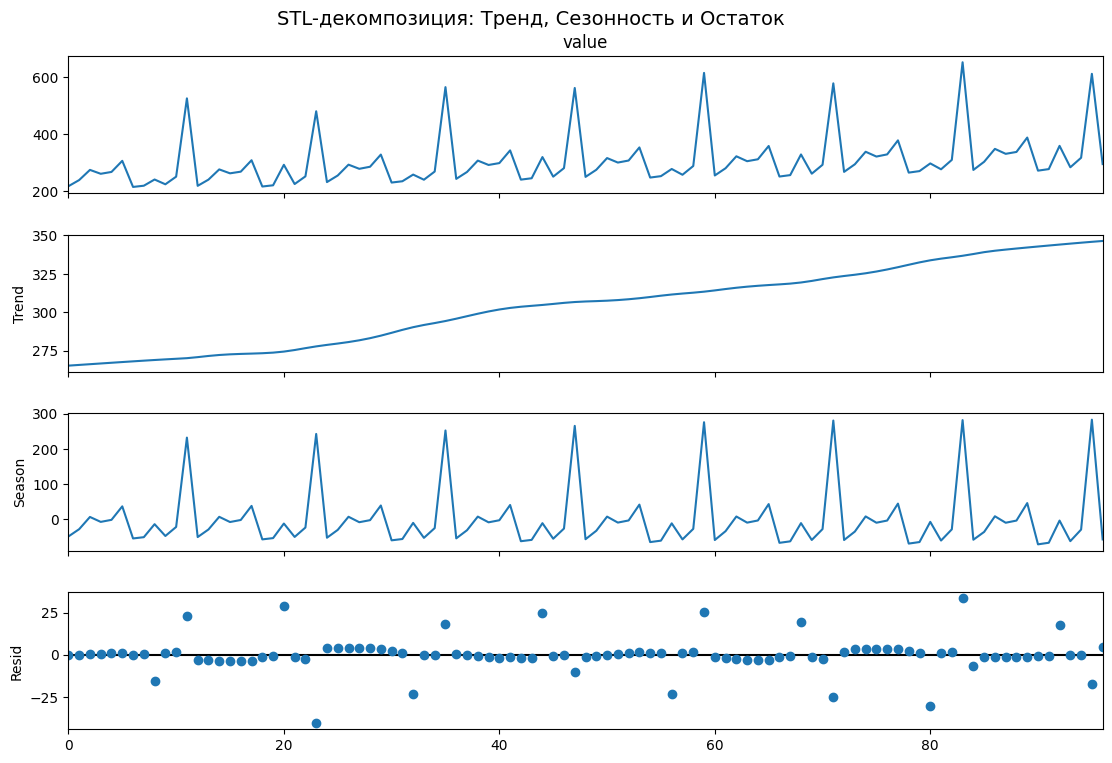

In [74]:
#1. Загрузка исходного временного ряда
df = pd.read_csv(data_path)
series = df.iloc[:, 0]  # берем первую колонку
series.index = pd.RangeIndex(start=0, stop=len(series), step=1)  # на всякий случай

# Визуализация исходного ряда
plt.figure(figsize=(12, 5))
plt.plot(series, label='Исходный ряд')
plt.title('Временной ряд — полные данные')
plt.legend()
plt.grid(True)
plt.show()

# 2. STL-декомпозиция (тренд и сезонность)
stl = STL(series, period=12)
result = stl.fit()

# Отрисовка компонентов
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL-декомпозиция: Тренд, Сезонность и Остаток", fontsize=14)
plt.show()



Прогнозы от моделей: ['arima', 'holt', 'prophet', 'tbats', 'ensemble']


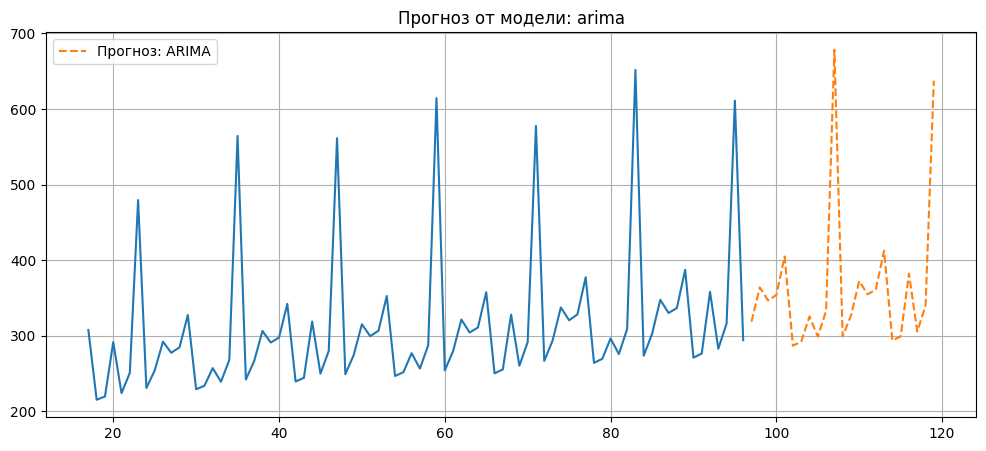

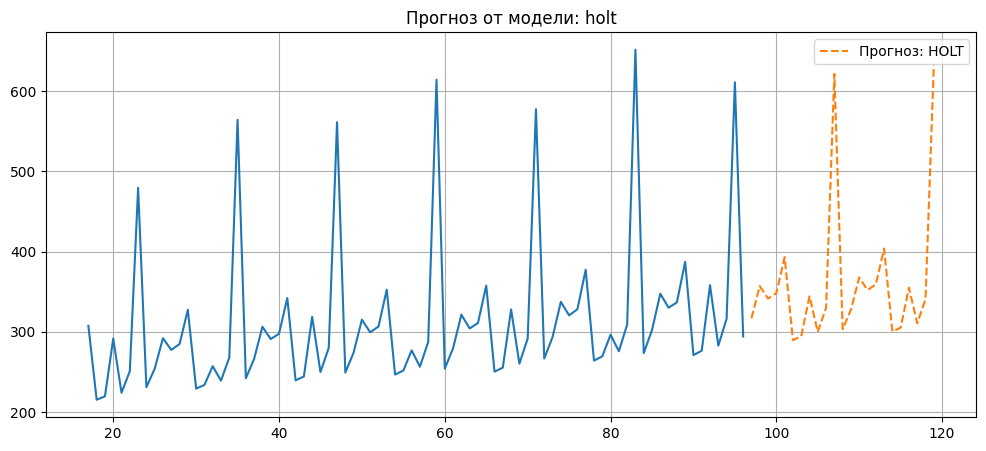

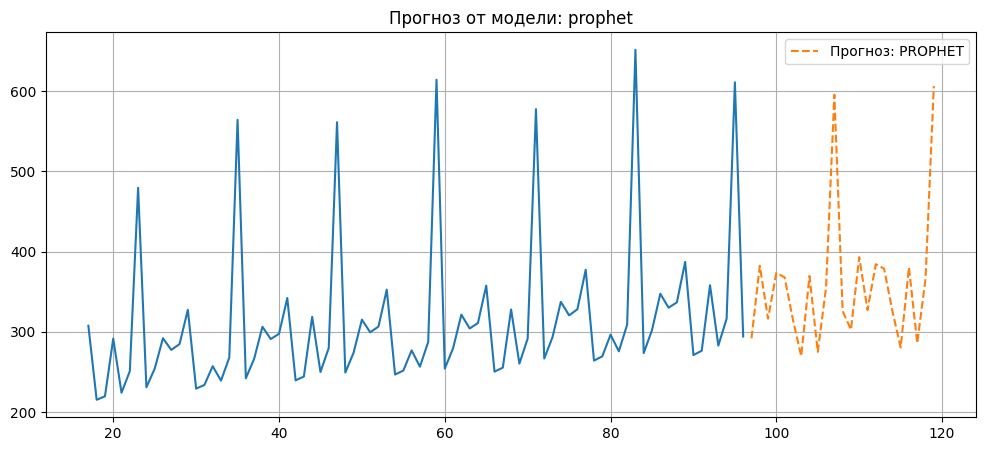

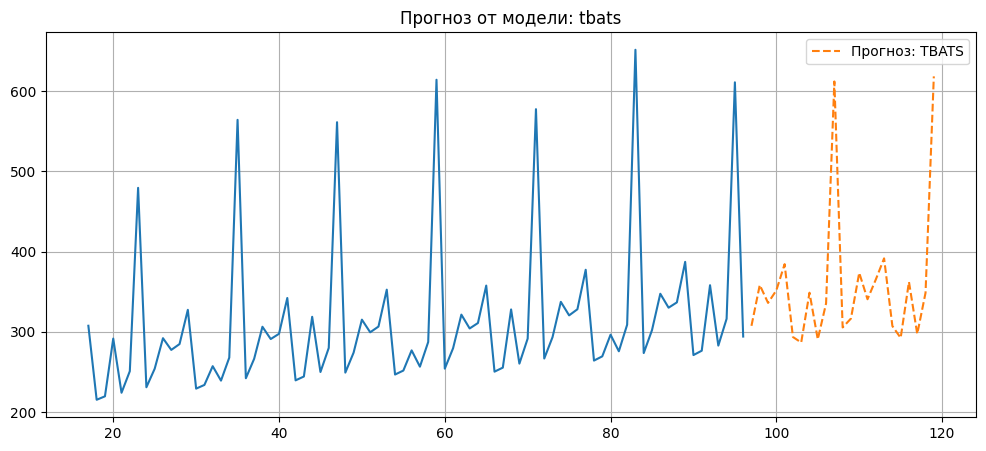

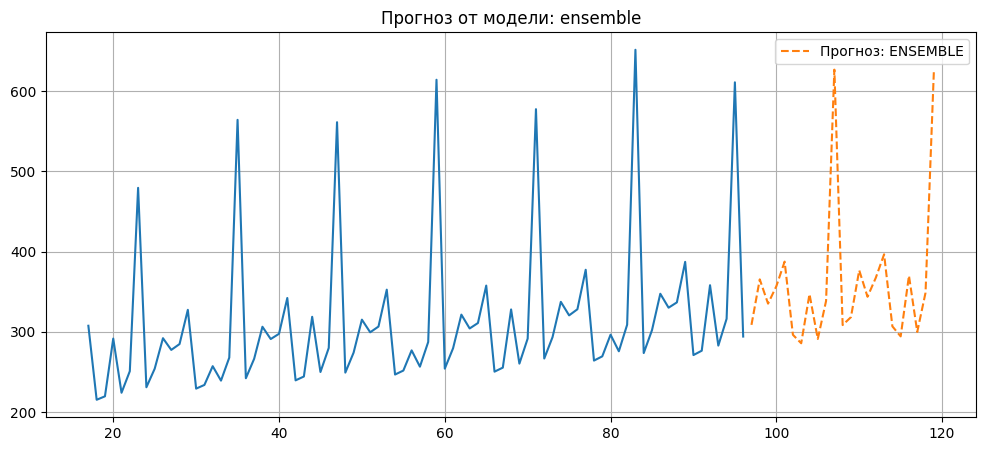

In [80]:
# 3. Загрузка прогноза
forecast_df = pd.read_csv(forecast_path)

# Убедимся, что названия колонок корректны
print("Прогнозы от моделей:", list(forecast_df.columns))

# 4. Визуализация прогноза от каждой модели
# Настройки:
horizon = len(forecast_df)
n_context = 80  # сколько последних точек показывать из исходного ряда

context = series[-n_context:]

# Построим график для каждой модели
for model_name in forecast_df.columns:
    forecast = forecast_df[model_name]

    plt.figure(figsize=(12, 5))
    plt.plot(context.index, context.values)
    plt.plot(range(context.index[-1]+1, context.index[-1]+1 + horizon),
             forecast, label=f'Прогноз: {model_name.upper()}', linestyle='--')
    plt.title(f"Прогноз от модели: {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [81]:
result = forecast_df['arima']
result.to_csv(f'result{2}_Sharova.csv', index=False)

# The Third experiment

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import os

# Пути к данным
data_path = 'data/data3.csv'
forecast_path = 'forecast3.csv'


In [ ]:
#1. Загрузка исходного временного ряда
df = pd.read_csv(data_path)
series = df.iloc[:, 0]  # берем первую колонку
series.index = pd.RangeIndex(start=0, stop=len(series), step=1)  # на всякий случай

# Визуализация исходного ряда
plt.figure(figsize=(12, 5))
plt.plot(series, label='Исходный ряд')
plt.title('Временной ряд — полные данные')
plt.legend()
plt.grid(True)
plt.show()

# 2. STL-декомпозиция (тренд и сезонность)
stl = STL(series, period=12)
result = stl.fit()

# Отрисовка компонентов
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL-декомпозиция: Тренд, Сезонность и Остаток", fontsize=14)
plt.show()



In [ ]:
# 3. Загрузка прогноза
forecast_df = pd.read_csv(forecast_path)

# Убедимся, что названия колонок корректны
print("Прогнозы от моделей:", list(forecast_df.columns))

# 4. Визуализация прогноза от каждой модели
# Настройки:
horizon = len(forecast_df)
n_context = 50  # сколько последних точек показывать из исходного ряда

context = series[-n_context:]

# Построим график для каждой модели
for model_name in forecast_df.columns:
    forecast = forecast_df[model_name]

    plt.figure(figsize=(12, 5))
    plt.plot(context.index, context.values, label='История')
    plt.plot(range(context.index[-1]+1, context.index[-1]+1 + horizon),
             forecast, label=f'Прогноз: {model_name.upper()}', linestyle='--')
    plt.title(f"Прогноз от модели: {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
result = forecast_df['arima']
result.to_csv(f'result{3}_Sharova.csv', index=False)